# Rainfall Prediction (Classification)
- **Objective:** Predict whether it will rain (Yes/No) based on weather features.
- **Target Variable:** `rainfall`
- **Features:** `day`, `pressure`, `maxtemp`, `temperature`, `mintemp`, `dewpoint`, `humidity`, `cloud`, `sunshine`, `winddirection`, `windspeed`
- **ML Models to Consider:** Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier
- **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score, ROC-AUC

### **Importing the necessary libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import pickle
import joblib

### **Loading the data and some basic exploration:**

In [2]:
data = pd.read_csv("Rainfall.csv")
data.head()
print("-" * 50)
data.info()
print("-" * 50)
data.isna().sum()
print("-" * 50)
data.shape

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
---------------------------------------

(366, 12)

In [3]:
# Numerical Summary:

data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [4]:
# Remove Extra Spaces from Column Names:

data.columns = data.columns.str.strip()

In [5]:
data.columns # Spaces removed successfully

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [6]:
# Dropping 'day' column as it is not relevant for prediction:

data = data.drop(columns=['day'])

In [7]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [8]:
data.isnull().sum() # Checking null values

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [9]:
# Replacing missing values with Mode and Median:

data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [10]:
data.isnull().sum()  # null values replaced

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

### **Changing Categorical Value into Numerical Data:**

In [11]:
data ['rainfall'] = data ['rainfall'].replace({'no':0, 'yes':1})

In [12]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [13]:
data['windspeed'].dtype # final check for null values

dtype('float64')

### **Exploratory Data Analysis:** With Visualizations

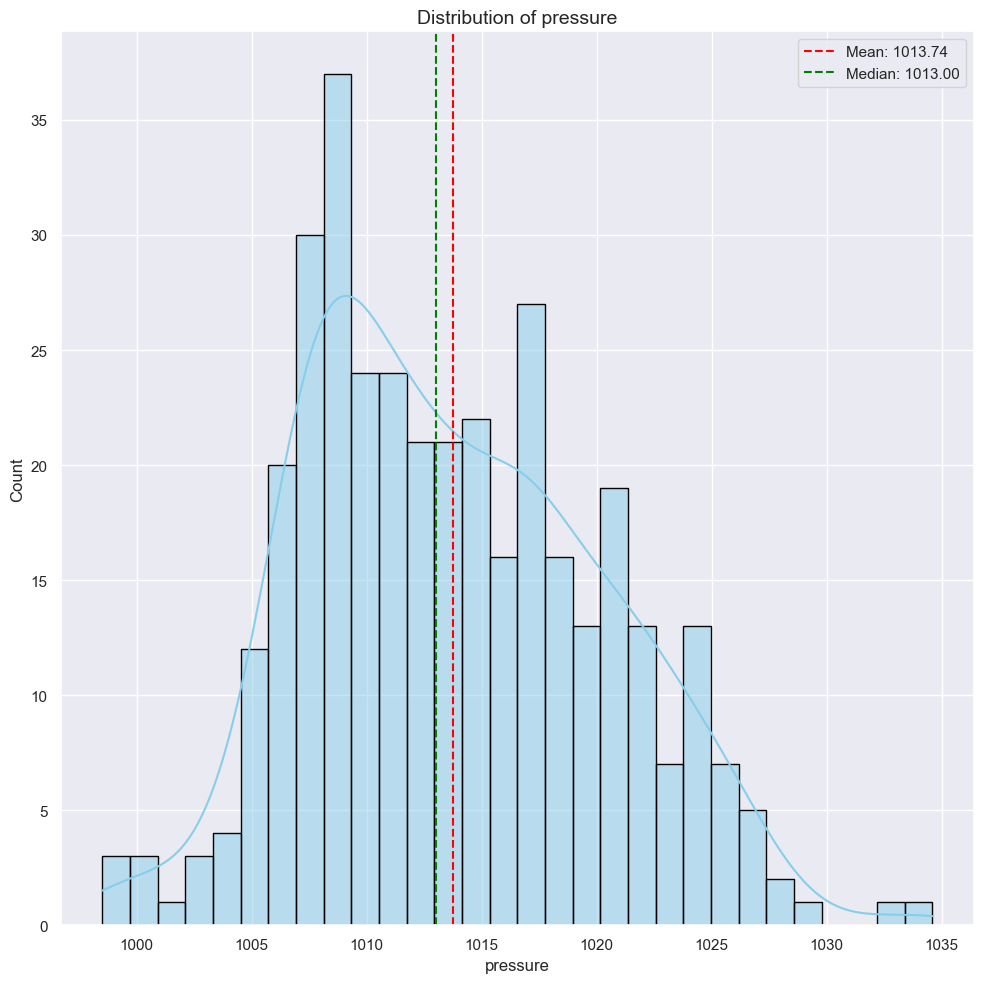

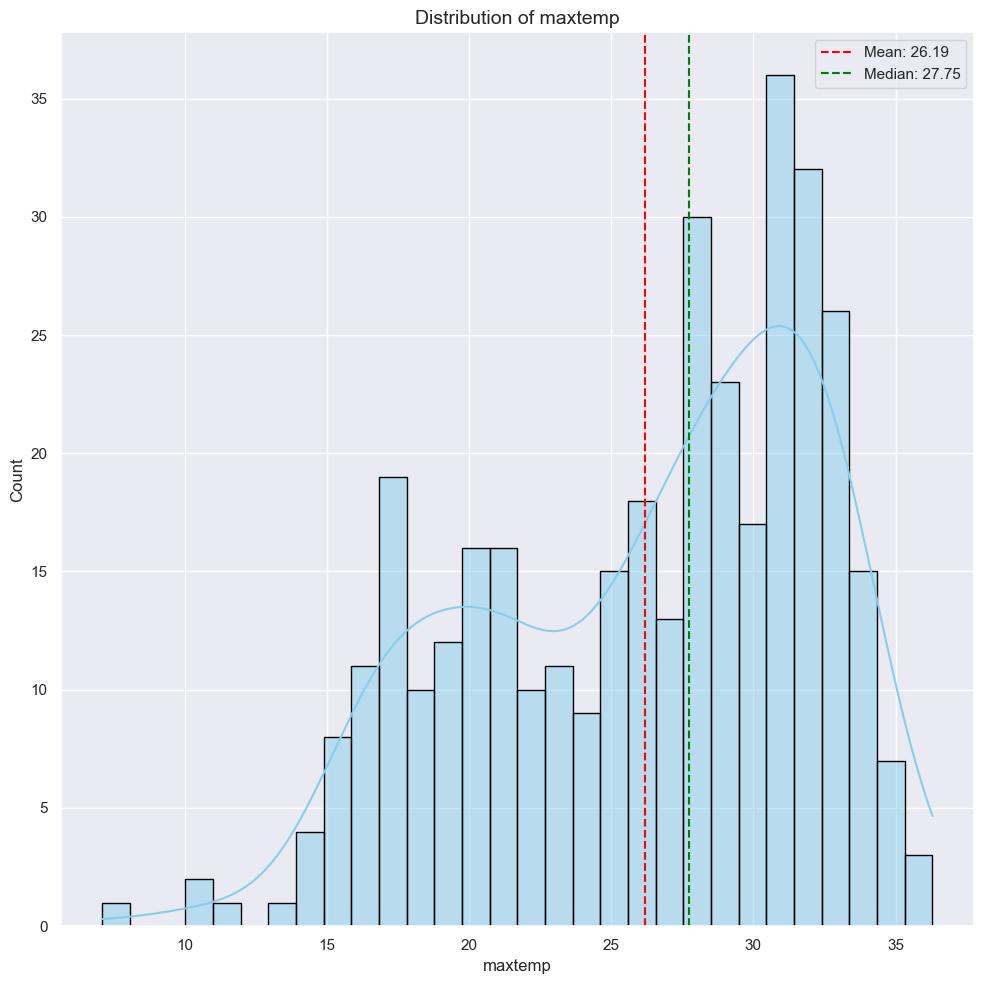

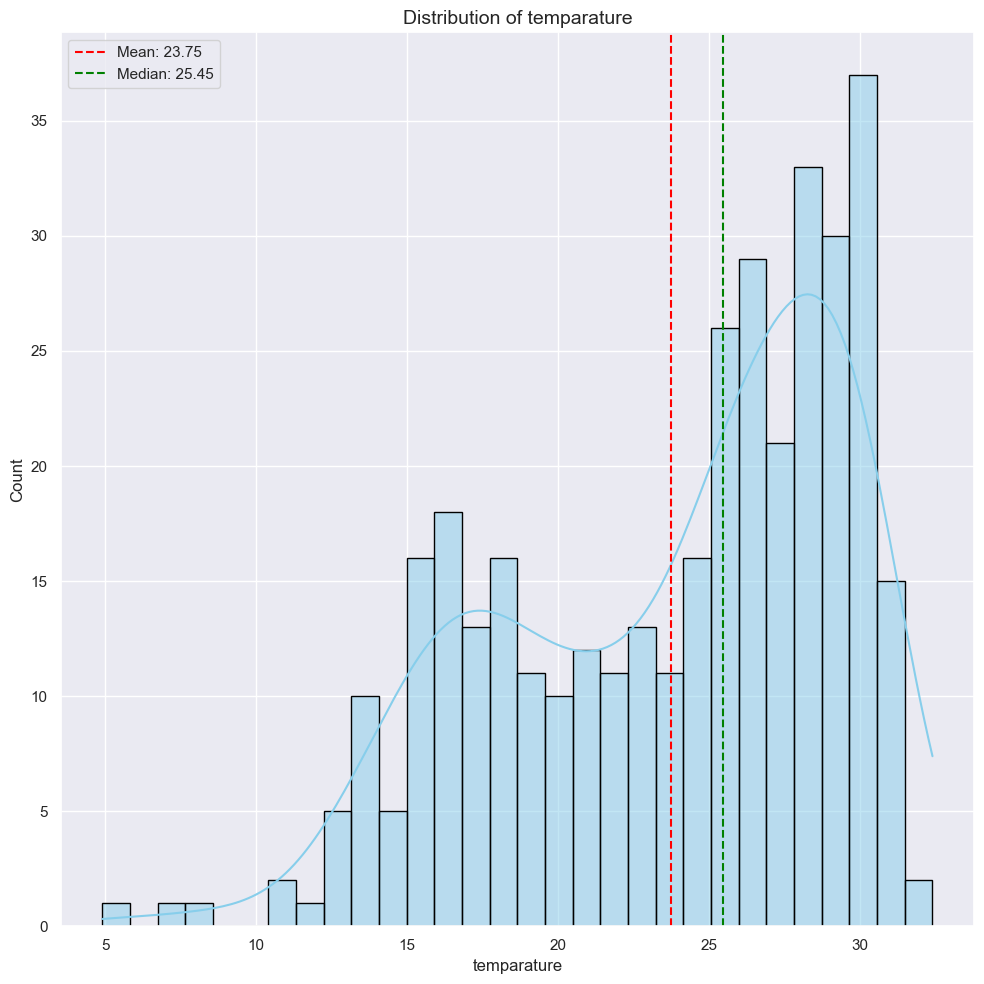

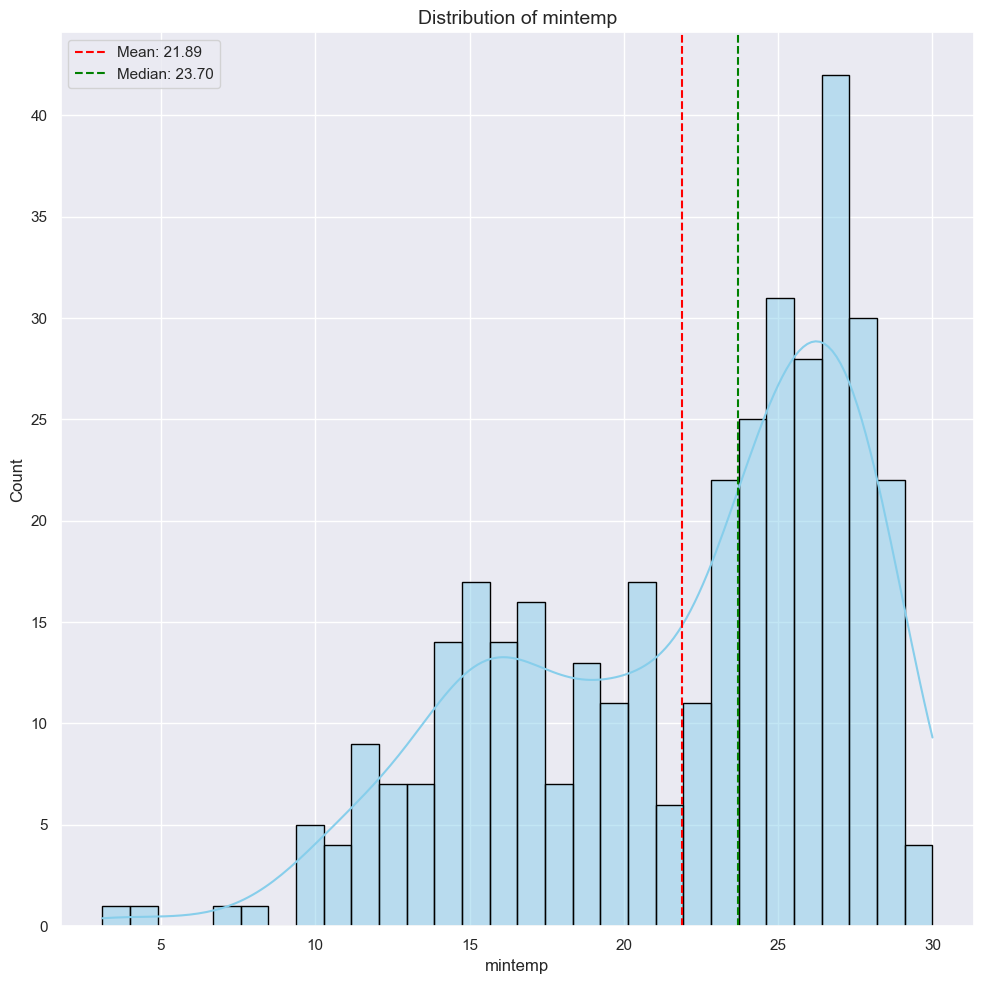

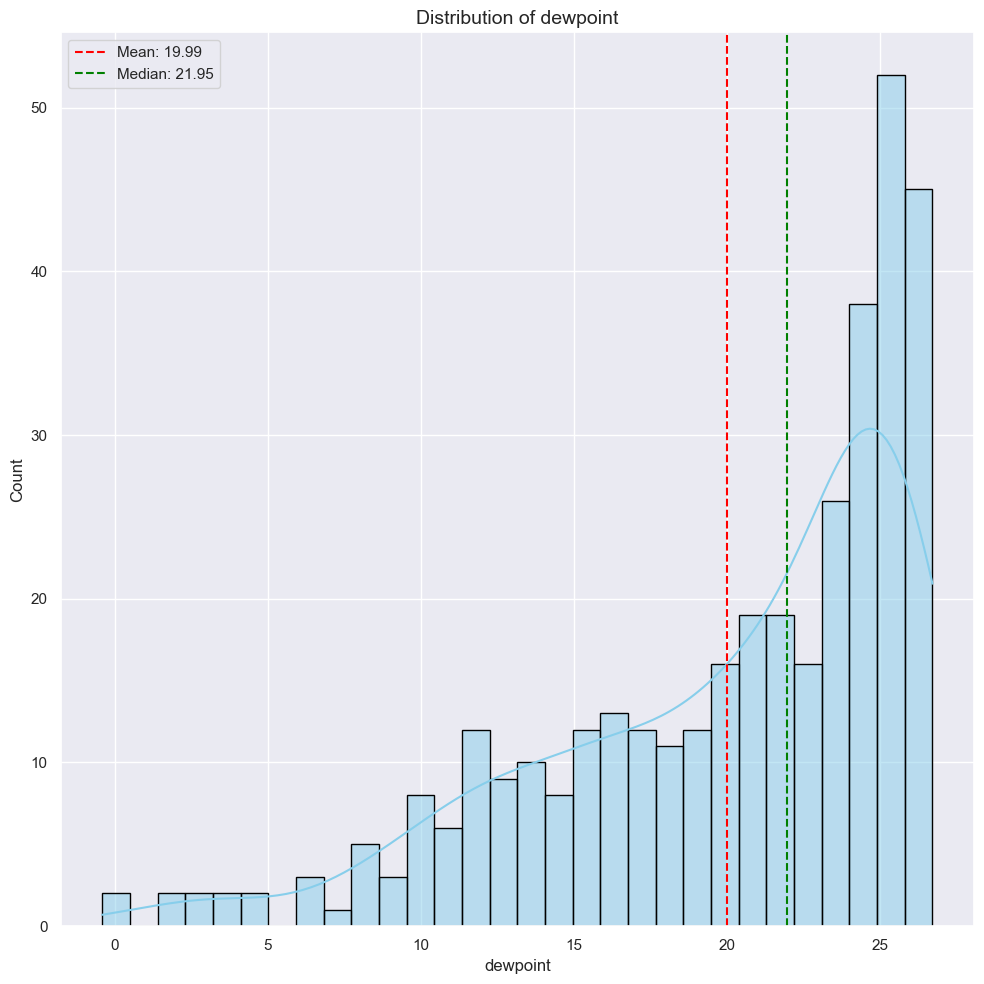

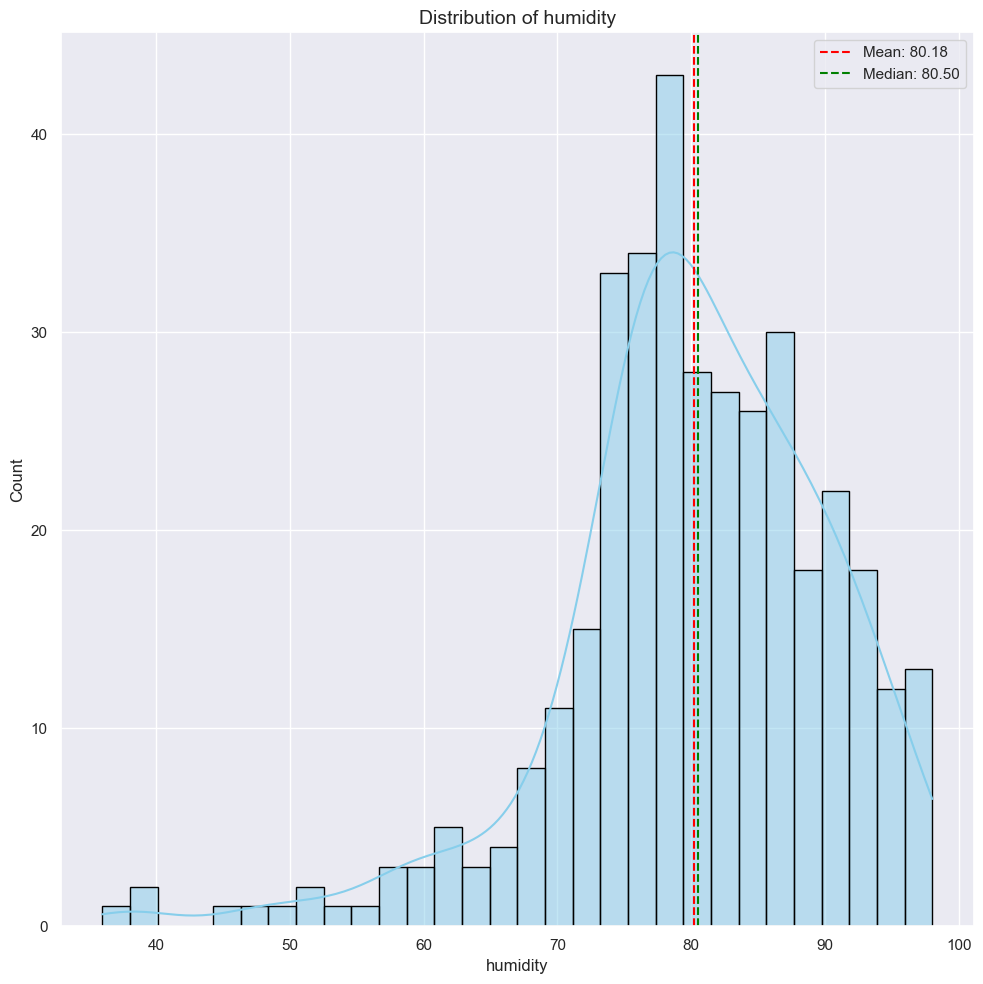

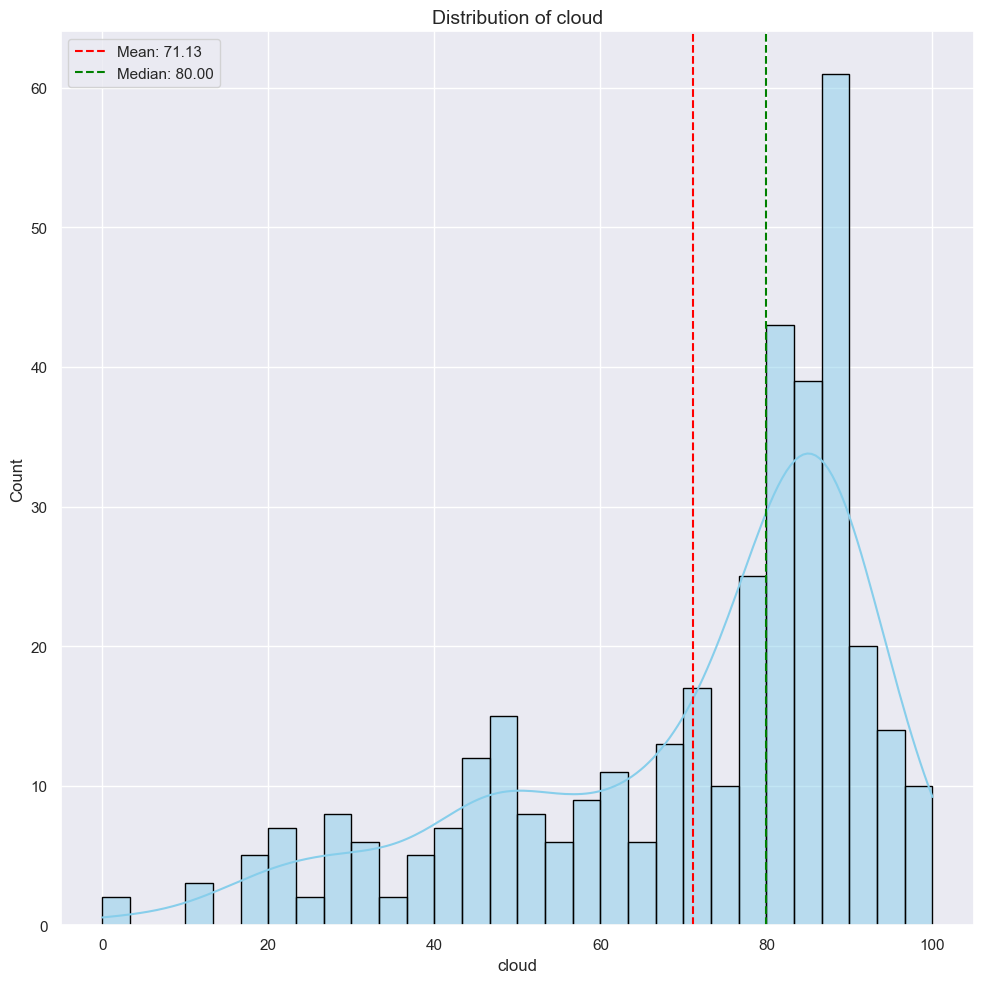

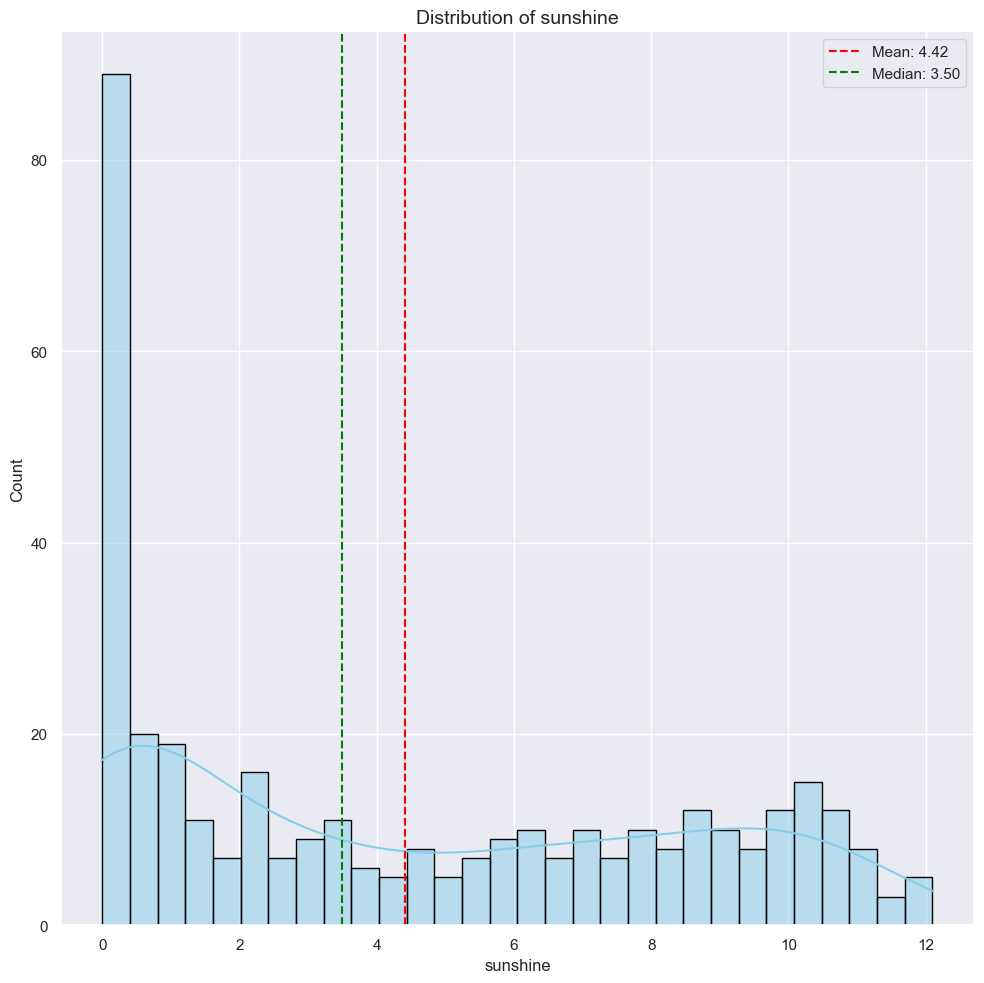

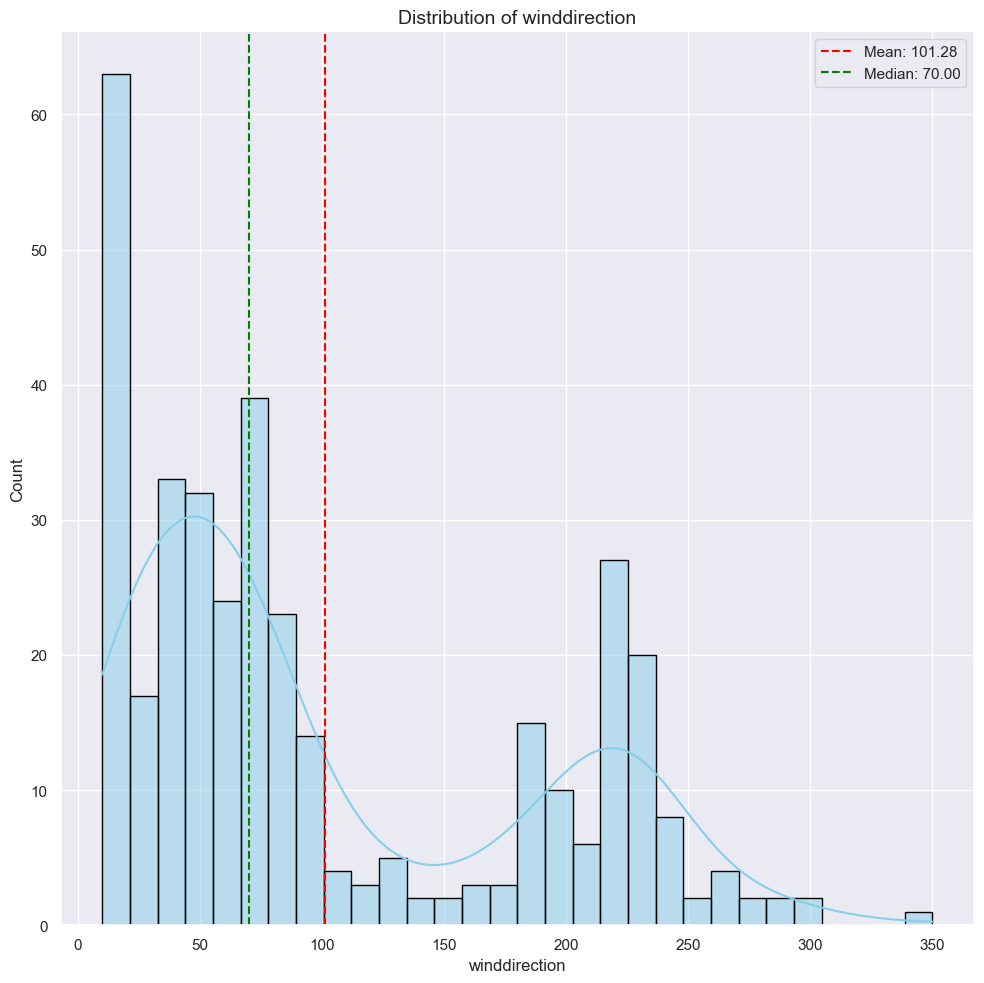

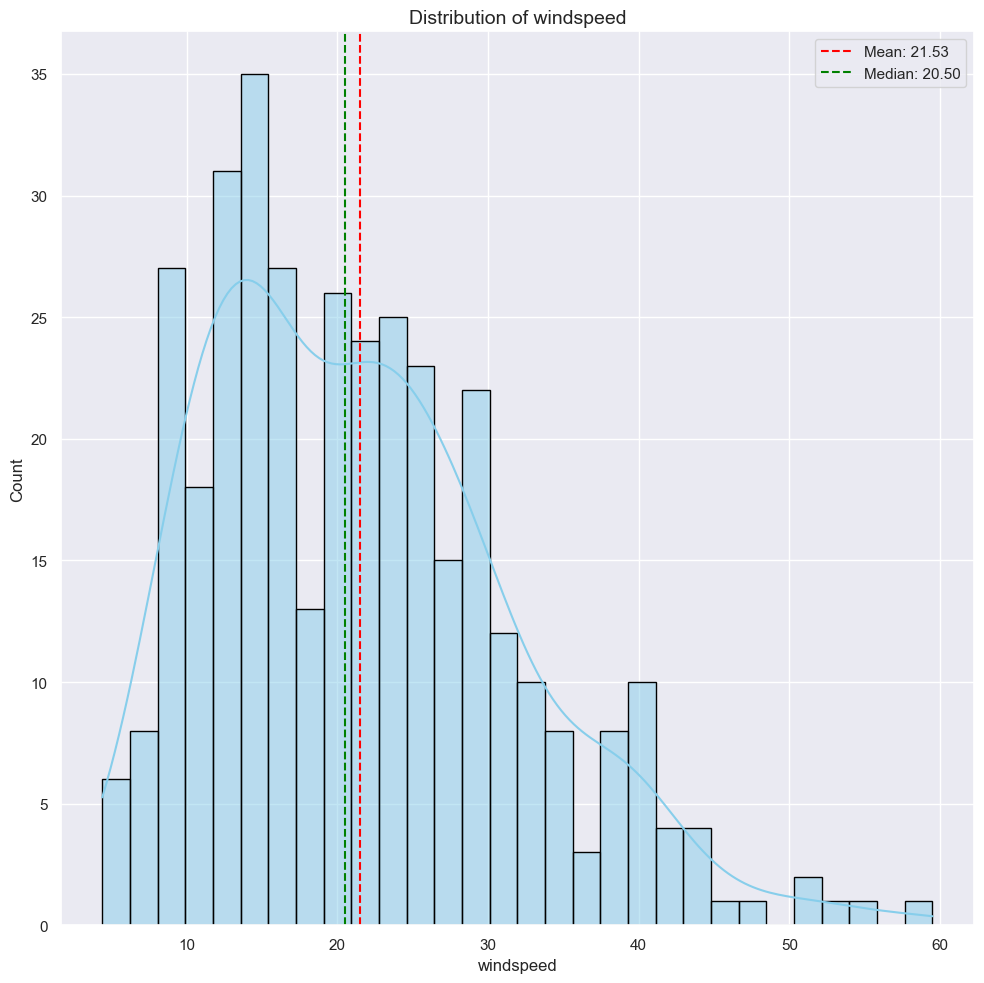

In [14]:
# Checking distribution of numerical features with histograms, mean, and median lines:

sns.set(style="darkgrid")

# Select numeric columns but exclude binary ones (like Rainfall)
numeric_cols = [
    col
    for col in data.select_dtypes(include=["float64", "int64"]).columns
    if data[col].nunique() > 2
]

for col in numeric_cols:
    plt.figure(figsize=(10, 10))
    sns.histplot(data[col], bins=30, kde=True, color="skyblue", edgecolor="black")

    mean_val = data[col].mean()
    median_val = data[col].median()

    plt.axvline(
        mean_val,
        color="red",
        linestyle="dashed",
        linewidth=1.5,
        label=f"Mean: {mean_val:.2f}",
    )
    plt.axvline(
        median_val,
        color="green",
        linestyle="dashed",
        linewidth=1.5,
        label=f"Median: {median_val:.2f}",
    )

    plt.title(f"Distribution of {col}", fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
# Skewness Calculation and Interpretation:

numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate skewness
skew_values = data[numeric_cols].skew()

# Print neatly
print("Skewness of each numerical column:\n")
for col, skew in skew_values.items():
    direction = (
        "Right-skewed (positive)"
        if skew > 0.5
        else "Left-skewed (negative)" if skew < -0.5 else "Approximately symmetric"
    )
    print(f"{col:20} : {skew:6.3f} → {direction}")

Skewness of each numerical column:

pressure             :  0.330 → Approximately symmetric
maxtemp              : -0.531 → Left-skewed (negative)
temparature          : -0.633 → Left-skewed (negative)
mintemp              : -0.713 → Left-skewed (negative)
dewpoint             : -1.050 → Left-skewed (negative)
humidity             : -1.056 → Left-skewed (negative)
cloud                : -1.078 → Left-skewed (negative)
rainfall             : -0.777 → Left-skewed (negative)
sunshine             :  0.360 → Approximately symmetric
winddirection        :  0.809 → Right-skewed (positive)
windspeed            :  0.781 → Right-skewed (positive)


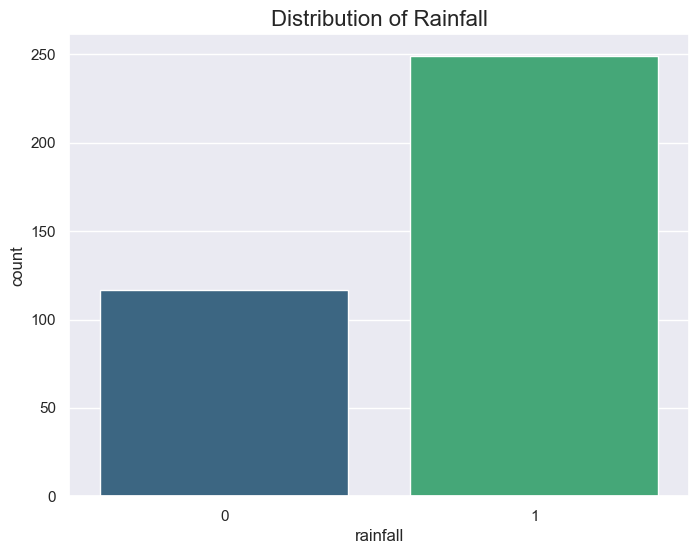

In [16]:
# Distribution of Rainfall:

plt.figure(figsize=(8, 6))
sns.countplot(x='rainfall', data=data, palette='viridis')
plt.title('Distribution of Rainfall', fontsize=16)
plt.show()

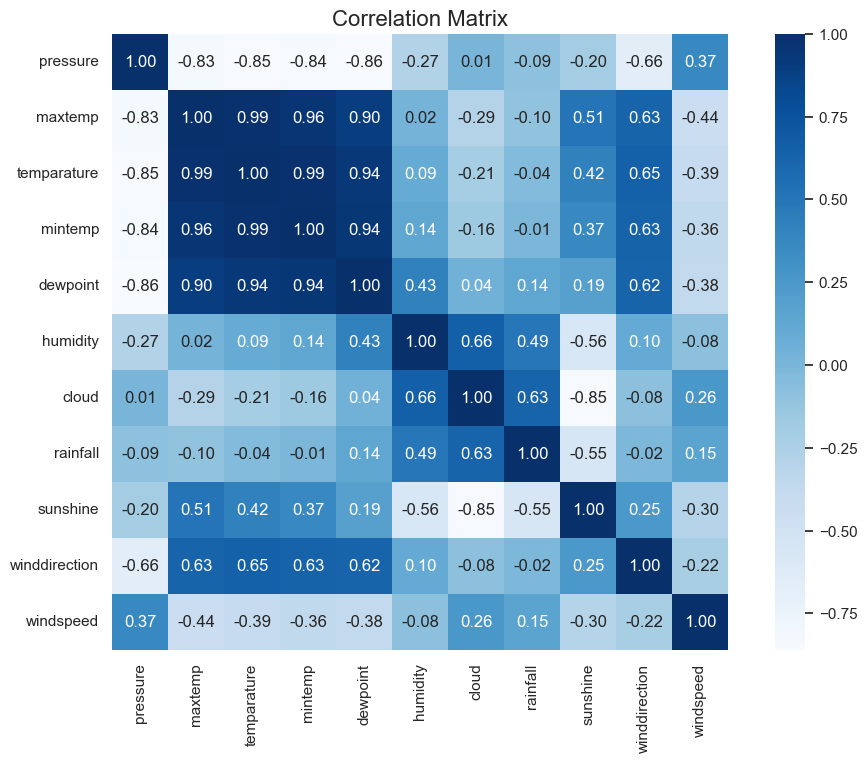

In [17]:
# Heatmap for Correlation Analysis:

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### Insights

Temperatures (`maxtemp`, `temparature`, `mintemp`, `dewpoint`) are highly correlated (0.90–0.99). Since they are driven by the same patterns, we keep only the most relevant to rainfall.

**Correlation with rainfall:**
- `dewpoint`: 0.14  
- `maxtemp`: -0.10  
- `temparature`: -0.04  
- `mintemp`: -0.01  

**Recommendation:** Keep `dewpoint` (highest correlation and physically meaningful), drop the others.


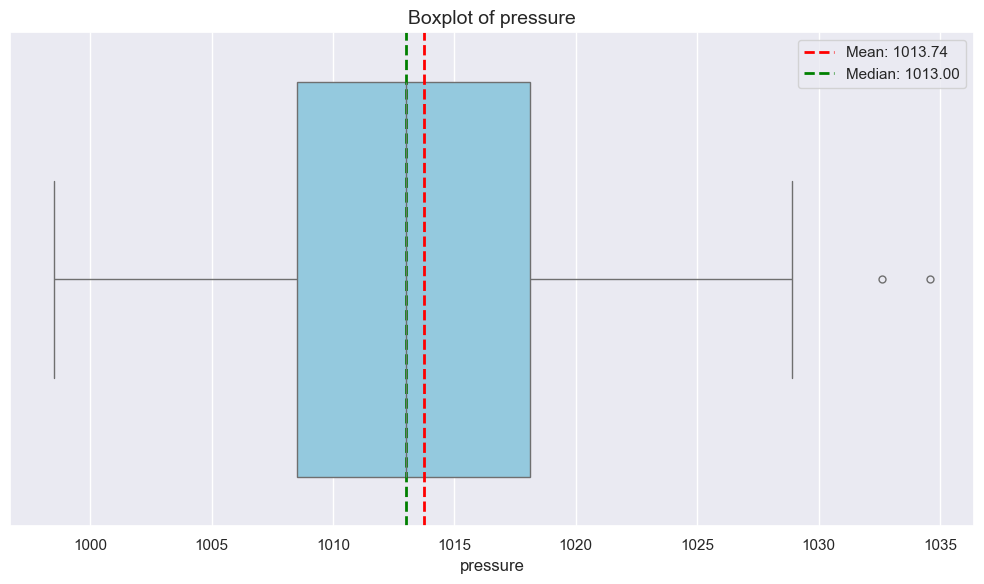

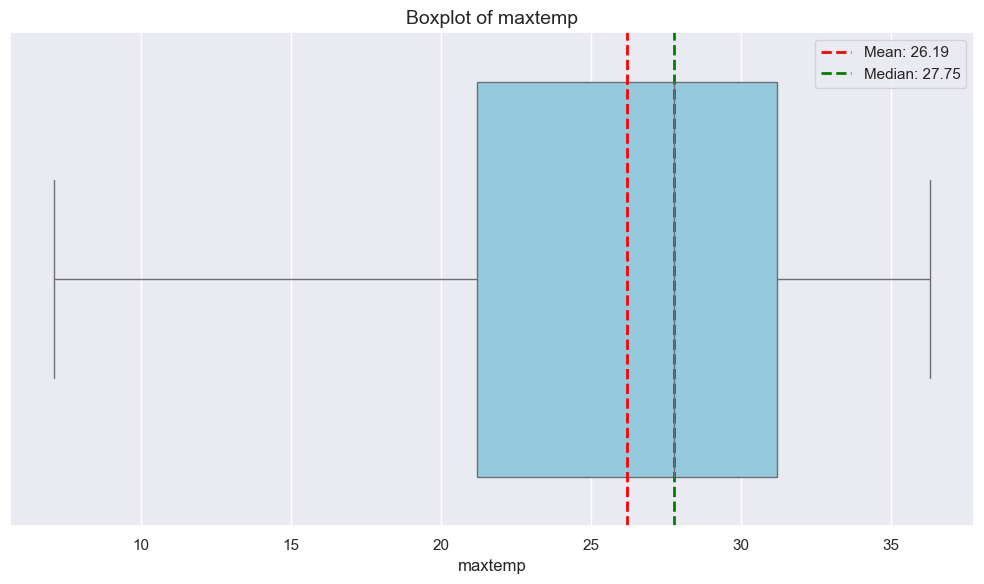

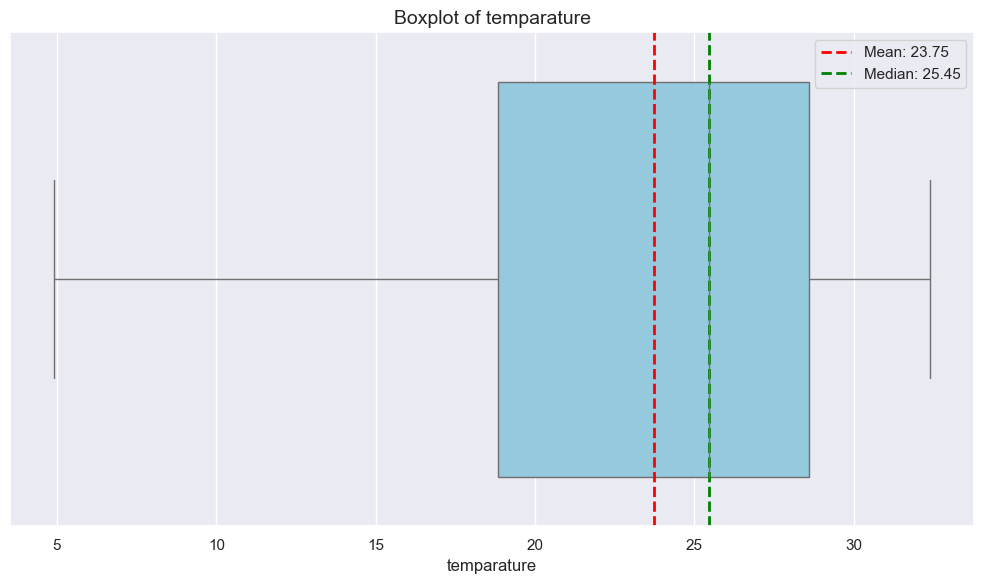

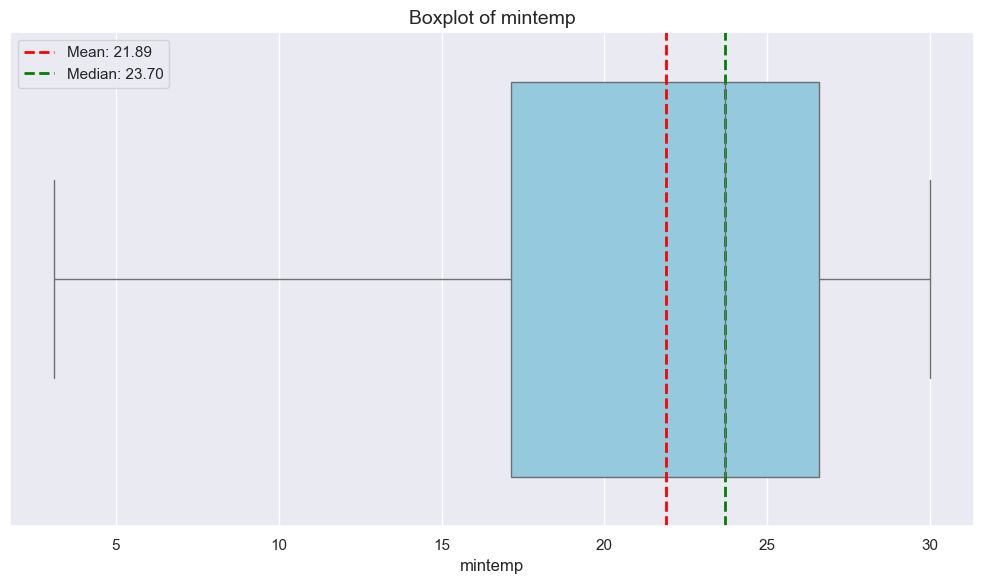

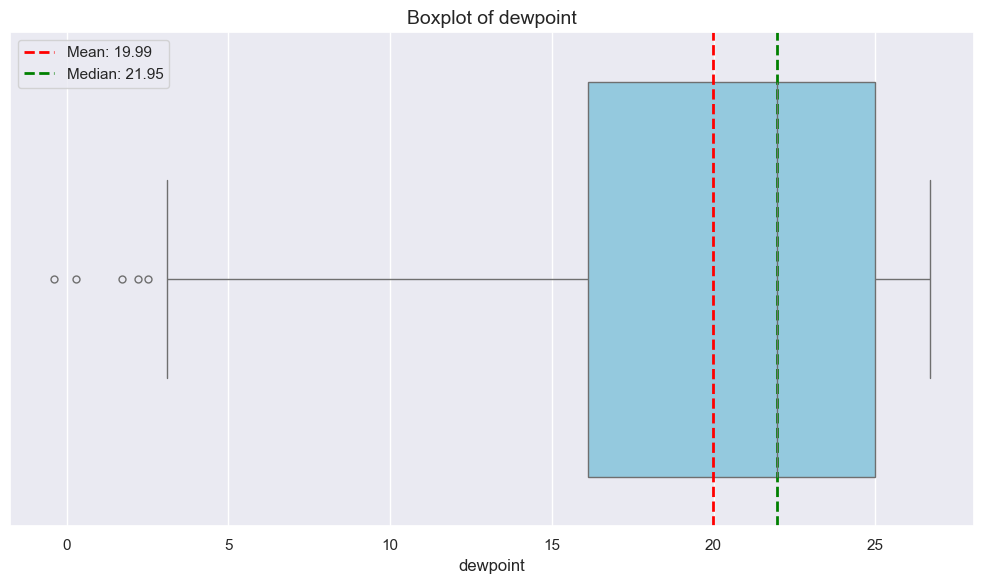

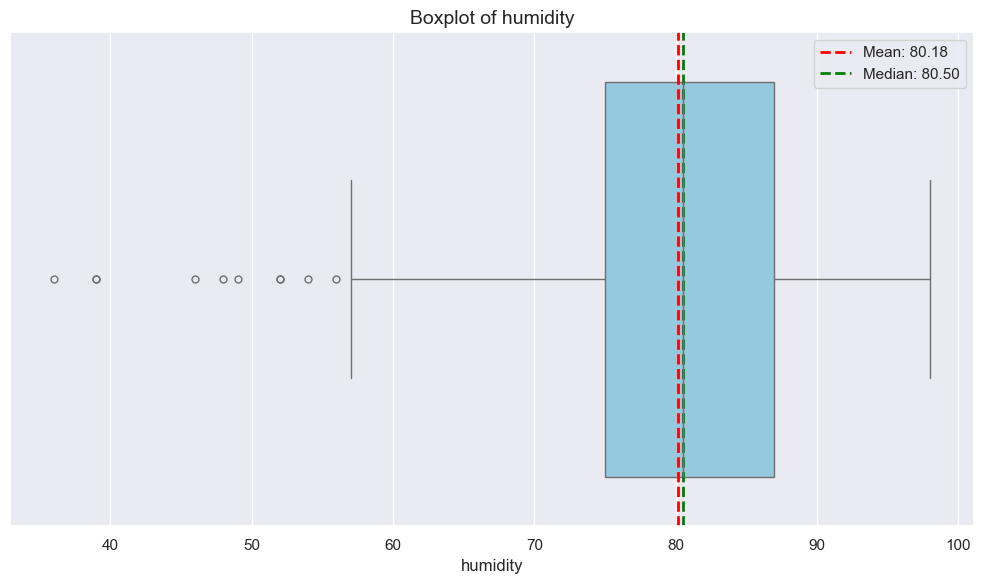

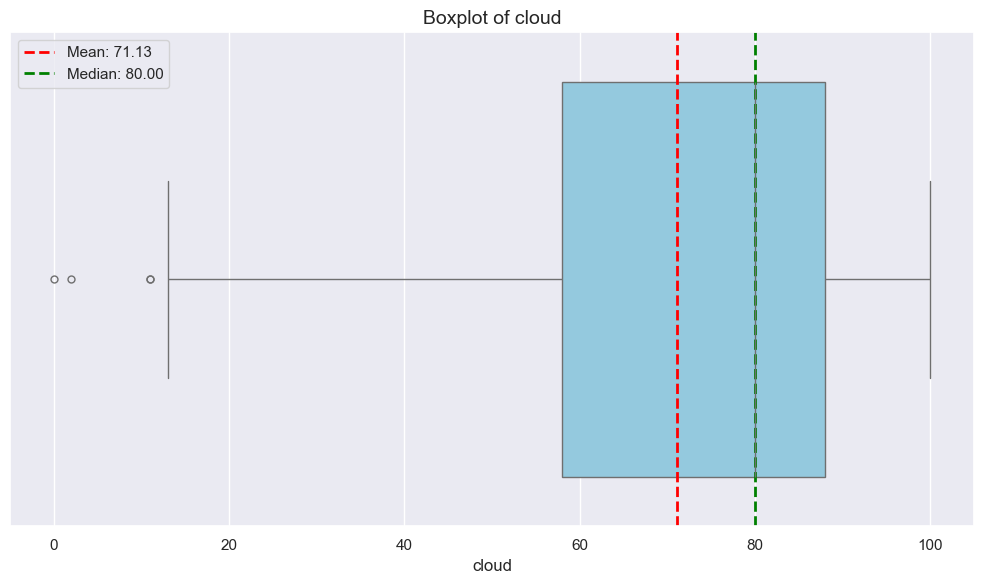

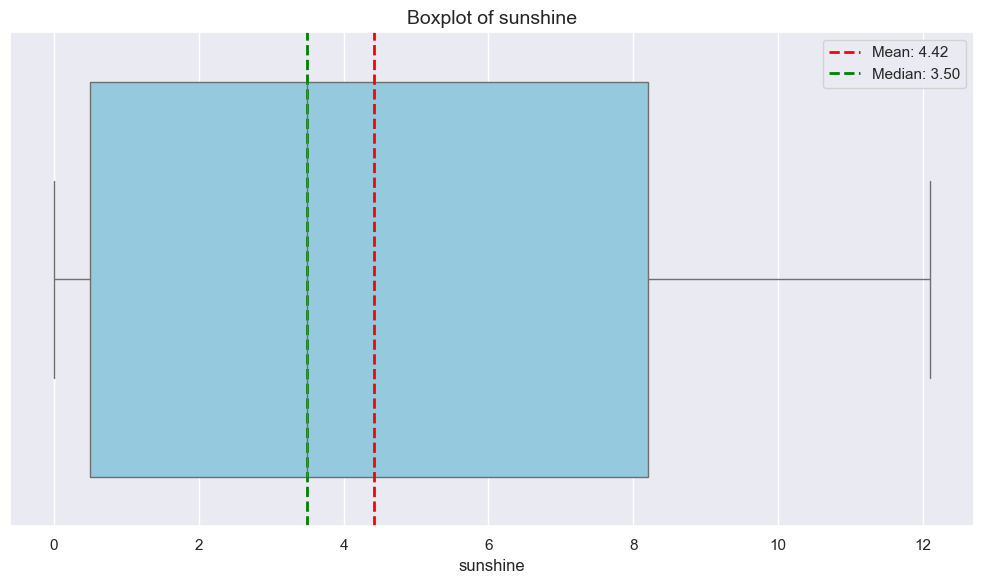

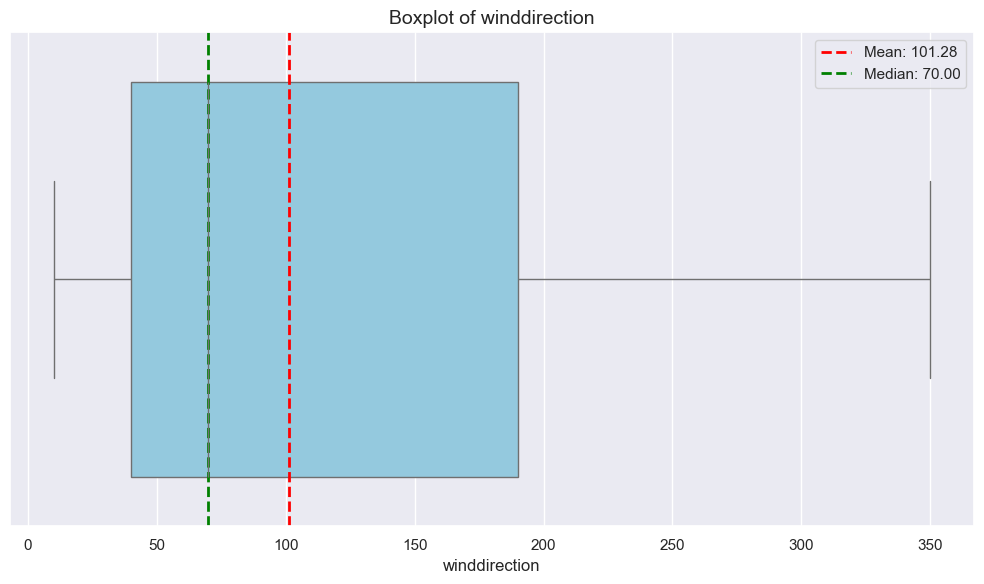

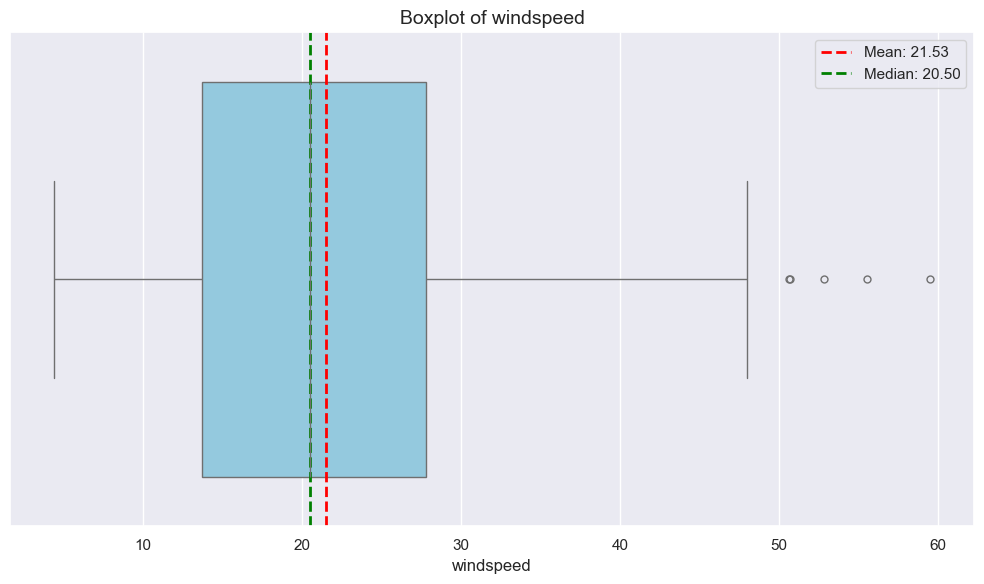

In [18]:
# Boxplots to Identify Outliers:

numeric_cols = [
    col
    for col in data.select_dtypes(include=["float64", "int64"]).columns
    if data[col].nunique() > 2
]

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x=data[col], color="skyblue", fliersize=5
    )

    # Add mean and median lines
    mean_val = data[col].mean()
    median_val = data[col].median()

    plt.axvline(
        mean_val,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {mean_val:.2f}",
    )
    plt.axvline(
        median_val,
        color="green",
        linestyle="--",
        linewidth=2,
        label=f"Median: {median_val:.2f}",
    )

    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

### **Datapreprocessing:**

In [19]:
# Dropping Highly Correlated Features:

data = data.drop(columns=["maxtemp", "temparature", "mintemp"])

In [20]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


### **Performing Downsampling:**

In [21]:
data["rainfall"].value_counts() # Checking class distribution

rainfall
1    249
0    117
Name: count, dtype: int64

### Downsampling:
- **What it does:** Reduces the number of samples in the majority class to match the minority class.

In [22]:
# Separating into majority and minority classes:

df_majority = data[data.rainfall == 1]
df_minority = data[data.rainfall == 0]

In [23]:
print(df_majority.shape, df_minority.shape)

(249, 8) (117, 8)


In [24]:
# Downsampled majority class to match minority class size:

df_majority_downsampled = resample(
    df_majority,
    replace=False,  # sampling without replacement
    n_samples=len(df_minority),  # to match minority class
    random_state=42,  # reproducible results
)

In [25]:
df_majority_downsampled.shape

(117, 8)

In [26]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.shape

(234, 8)

In [27]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [28]:
# Shuffling the downsampled dataset:

df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [29]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

### **Splitting the data into Test and Training Data:**

In [30]:
X1 = df_downsampled.drop('rainfall', axis=1)
y1 = df_downsampled['rainfall']

print(X1.shape, y1.shape)

(234, 7) (234,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

### **Model Training:**

In [32]:
# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric="logloss", random_state=42
)

# Fitting the models on the training data
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions on test set
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

### **Model Evaluation:**

In [33]:
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Precision: {prec:.2f}%")
    print(f"Recall: {rec:.2f}%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Evaluate all models
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- Decision Tree ---
Accuracy: 65.96%
F1 Score: 65.22%
Precision: 65.22%
Recall: 65.22%
Confusion Matrix:
 [[16  8]
 [ 8 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.65      0.65      0.65        23

    accuracy                           0.66        47
   macro avg       0.66      0.66      0.66        47
weighted avg       0.66      0.66      0.66        47

--- Random Forest ---
Accuracy: 74.47%
F1 Score: 75.00%
Precision: 72.00%
Recall: 78.26%
Confusion Matrix:
 [[17  7]
 [ 5 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

--- XGBoost ---
Accuracy: 76.60%
F1 Score:

### **Model Performance Comparison:** With Default Parameters

| Model            | Accuracy (%) | F1 Score (%) | Precision (%) | Recall (%) |
|-----------------|--------------|--------------|---------------|------------|
| Decision Tree    | 65.96        | 65.22        | 65.22         | 65.22      |
| Random Forest    | 74.47        | 75.00        | 72.00         | 78.26      |
| XGBoost          | 76.60        | 76.60        | 75.00         | 78.26      |

**Key Insights:**
- **XGBoost** performs best overall with the highest accuracy and F1 score from this one split.
- **Random Forest** is a close second, with strong recall.
- **Decision Tree** has the lowest overall performance among the three.


In [34]:
# Cross-Validation for Robustness Check:
models = [dt_model, rf_model, xgb_model]

for model in models:
    scores = cross_val_score(model, X1, y1, cv=5, scoring="f1")
    print(f"{model.__class__.__name__} Cross-Validated F1 Scores (5 folds): {scores}")
    print(f"Mean F1 Score: {np.mean(scores):.4f}\n")

    scores = cross_val_score(model, X1, y1, cv=5, scoring="accuracy")
    print(f"{model.__class__.__name__} Cross-Validated Accuracy Scores (5 folds): {scores}")
    print(f"Mean Accuracy Score: {np.mean(scores):.4f}\n")

DecisionTreeClassifier Cross-Validated F1 Scores (5 folds): [0.63414634 0.63414634 0.65116279 0.72340426 0.76      ]
Mean F1 Score: 0.6806

DecisionTreeClassifier Cross-Validated Accuracy Scores (5 folds): [0.68085106 0.68085106 0.68085106 0.72340426 0.73913043]
Mean Accuracy Score: 0.7010

RandomForestClassifier Cross-Validated F1 Scores (5 folds): [0.75555556 0.77272727 0.77272727 0.80851064 0.84      ]
Mean F1 Score: 0.7899

RandomForestClassifier Cross-Validated Accuracy Scores (5 folds): [0.76595745 0.78723404 0.78723404 0.80851064 0.82608696]
Mean Accuracy Score: 0.7950

XGBClassifier Cross-Validated F1 Scores (5 folds): [0.69767442 0.74418605 0.76190476 0.70833333 0.8627451 ]
Mean F1 Score: 0.7550

XGBClassifier Cross-Validated Accuracy Scores (5 folds): [0.72340426 0.76595745 0.78723404 0.70212766 0.84782609]
Mean Accuracy Score: 0.7653



### **Cross-Validation Metrics (5 Folds):**

| Model                  | Metric   | Fold 1 (%) | Fold 2 (%) | Fold 3 (%) | Fold 4 (%) | Fold 5 (%) | Mean (%) |
|------------------------|---------|------------|------------|------------|------------|------------|----------|
| Decision Tree          | F1      | 63.41      | 63.41      | 65.12      | 72.34      | 76.00      | 68.06    |
|                        | Accuracy| 68.09      | 68.09      | 68.09      | 72.34      | 73.91      | 70.10    |
| Random Forest          | F1      | 75.56      | 77.27      | 77.27      | 80.85      | 84.00      | 78.99    |
|                        | Accuracy| 76.60      | 78.72      | 78.72      | 80.85      | 82.61      | 79.50    |
| XGBoost                | F1      | 69.77      | 74.42      | 76.19      | 70.83      | 86.27      | 75.50    |
|                        | Accuracy| 72.34      | 76.60      | 78.72      | 70.21      | 84.78      | 76.53    |

### **Model Selection Insight:**

Based on cross-validation results, **Random Forest** is selected as the best model.  
- It has the highest **mean F1 score (78.99%)** and **mean accuracy (79.50%)** across 5 folds.  
- It also shows **more stable performance** across folds compared to XGBoost, which has larger variability. 


### **Hyperparamter Tuning:** GridSearchCV

In [ ]:
# Random Forest Hyperparameter Tuning with GridSearchCV:

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 5, 10, 15],  # Max depth of each tree
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples at a leaf node
    "max_features": [
        "auto",
        "sqrt",
        "log2",
    ],  # Number of features to consider at each split
}

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best F1 Score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7446808510638298
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [ ]:
# Decision Tree Hyperparameter Tuning with GridSearchCV:

dt_model = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth": [None, 5, 10, 15],  # Maximum depth of tree
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples at a leaf node
    "max_features": [
        None,
        "sqrt",
        "log2",
    ],  
    "criterion": ["gini", "entropy"],
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)

# Fit to training data
grid_search_dt.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)
print("Best F1 Score (Decision Tree):", grid_search_dt.best_score_)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score (Decision Tree): 0.7902323376007587
Accuracy: 0.6595744680851063
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.65      0.65      0.65        23

    accuracy                           0.66        47
   macro avg       0.66      0.66      0.66        47
weighted avg       0.66      0.66      0.66        47



In [ ]:
# XGBoost Hyperparameter Tuning with GridSearchCV:

xgb_model = XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric="logloss"
)
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1],
    "colsample_bytree": [0.7, 0.8, 1],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
grid_search_xgb.fit(X_train, y_train)

print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best F1 Score (XGBoost):", grid_search_xgb.best_score_)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Best F1 Score (XGBoost): 0.8248985185442181
Accuracy: 0.7659574468085106
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.75      0.78      0.77        23

    accuracy                           0.77        47
   macro avg       0.77      0.77      0.77        47
weighted avg       0.77      0.77      0.77        47



### **Hyperparameter-Tuned Model Performance:**

| Model            | Cross-Validated F1 Score | Test Accuracy (%) | Test F1 (%) | Precision (%) | Recall (%) |
|-----------------|-------------------------|-----------------|------------|---------------|------------|
| Decision Tree    | 0.7902                  | 65.96           | 65.22      | 65.22         | 65.22      |
| Random Forest    | 0.8163                  | 74.47           | 75.00      | 72.00         | 78.26      |
| XGBoost          | 0.8249                  | 76.60           | 76.60      | 75.00         | 78.26      |

**Key Insights:**
- XGBoost has the highest cross-validated F1 score (0.825) and test accuracy (76.60%).  
- Random Forest performs closely (CV F1 0.816, accuracy 74.47%) and is slightly more stable across folds.  
- Decision Tree has lower test performance (accuracy 65.96%) despite a good CV F1 score, indicating less generalization.


### Why F1 Score is Preferred

- **Balances Precision and Recall:** F1 score is the harmonic mean of precision and recall, capturing both false positives and false negatives.  
- **Useful for Imbalanced Data:** Even after downsampling, F1 ensures that the model performs well on both classes, rather than just the majority class.  
- **More Informative than Accuracy Alone:** Accuracy can be misleading if the model slightly favors one class; F1 gives a better measure of **balanced predictive performance**.  
- **Robust for Model Selection:** Optimizing F1 helps select models that are reliable and effective at detecting the minority class without overfitting.


### **Saving the best Models:**

In [ ]:
# -----------------------------
# 1. Save the best models
# -----------------------------
models = {
    "RandomForest": grid_search_rf.best_estimator_,
    "DecisionTree": grid_search_dt.best_estimator_,
    "XGBoost": grid_search_xgb.best_estimator_,
}

joblib.dump(models, "best_models.pkl")
print("All models saved successfully!")

# -----------------------------
# 2. Load models (optional)
# -----------------------------
loaded_models = joblib.load("best_models.pkl")

# -----------------------------
# 3. Evaluate models on test set
# -----------------------------
for name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} Performance ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
    print(f"{name} F1 Score:", round(f1_score(y_test, y_pred) * 100, 2), "%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

All models saved successfully!
--- RandomForest Performance ---
Accuracy: 74.47 %
RandomForest F1 Score: 75.0 %
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



--- DecisionTree Performance ---
Accuracy: 65.96 %
DecisionTree F1 Score: 70.37 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        24
           1       0.61      0.83      0.70        23

    accuracy                           0.66        47
   macro avg       0.68      0.66      0.65        47
weighted avg       0.68      0.66      0.65        47



--- XGBoost Performance ---
Accuracy: 74.47 %
XGBoost F1 Score: 75.0 %
Classification Report:
      

### **Test Set Performance of Best Models:**

| Model            | Accuracy (%) | F1 Score (%) | Precision (%) | Recall (%) |
|-----------------|--------------|--------------|---------------|------------|
| Random Forest    | 74.47        | 75.00        | 72.00         | 78.26      |
| Decision Tree    | 65.96        | 70.37        | 68.00         | 66.00      |
| XGBoost          | 74.47        | 75.00        | 72.00         | 78.26      |

**Key Insights:**
- Random Forest and XGBoost show very similar and **balanced performance** across metrics.  
- Decision Tree has lower accuracy and a **less balanced precision/recall**, indicating overfitting.  
- Ensemble models are **more reliable** for generalization on unseen data.


### **Building a Predictive System:**

In [ ]:
# -----------------------------
# 4. Making a Predictive System
# -----------------------------
input_data = (1015.9, 19.9, 95, 81, 40.0, 13.7, 7)  # removed 'rainfall' column
input_df = pd.DataFrame(
    [input_data],
    columns=[
        "pressure",
        "dewpoint",
        "humidity",
        "cloud",
        "sunshine",
        "winddirection",
        "windspeed",
    ],
)

# Example: predict using Random Forest from loaded models
rf_model = loaded_models["RandomForest"]
prediction = rf_model.predict(input_df)
probability = rf_model.predict_proba(input_df)

print("Prediction:", "Rainfall" if prediction[0] == 1 else "No Rainfall")
print("Probability of No Rainfall:", round(probability[0][0] * 100, 2), "%")
print("Probability of Rainfall:", round(probability[0][1] * 100, 2), "%")

Prediction: No Rainfall
Probability of No Rainfall: 54.82 %
Probability of Rainfall: 45.18 %


In [ ]:
data.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')